# Battery Project LG - State of Charge

In [7]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 14.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 14.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 16.9 MB/s eta 0:00:00


In [3]:
import scipy.io
import pandas as pd
import numpy as np
import os

path0 = 'TRAIN_LGHG2@n10degC_to_25degC_Norm_5Inputs.mat'
def  mat2pandas ( path0):
    mat = scipy.io.loadmat(path0)

    df = pd.DataFrame(mat['X'].T,columns=['V','I','T','V_avg','I_avg'])
    df['soc'] = mat['Y'].T
    return df

train_df = mat2pandas('TRAIN_LGHG2@n10degC_to_25degC_Norm_5Inputs.mat')


test_dfs = [mat2pandas(i) for i in list(os.listdir('./')) if 'TEST' in i]
# print(test_dfs[0])

# Exploring Data

In [5]:
display(train_df)

,V,I,T,V_avg,I_avg,soc
0,0.385148,0.75102,0.303101,0.385148,0.75102,0.206417
1,0.385152,0.75102,0.304591,0.385150,0.75102,0.206417
2,0.385156,0.75102,0.306081,0.385152,0.75102,0.206417
3,0.385160,0.75102,0.307572,0.385154,0.75102,0.206417
4,0.385164,0.75102,0.309062,0.385156,0.75102,0.206417
...,...,...,...,...,...,...
669951,0.478843,0.75102,0.008477,0.459558,0.75102,0.283243
669952,0.478843,0.75102,0.008477,0.459699,0.75102,0.283243
669953,0.478843,0.75102,0.008477,0.459839,0.75102,0.283243
669954,0.478961,0.75102,0.008477,0.459979,0.75102,0.283243


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


### Method 1

$SOC(t)   = SOC(t)-1 +I_c(t) Q_n \Delta t$ 

$I_c(t)$  = Discharging Current at Time t

SOC(t)    = Estimated SoC at Time t

SOC(t)-1  = Previously Estimated SoC at t-1 or SoC value Given by Manufacturer

$Q_n$     = full battery capacity charges

$\Delta$t = Difference in time

### Method 2
Voltage method
### Method 3
Measuring using hydrometer

Text(0.5, 0, 't (s)')

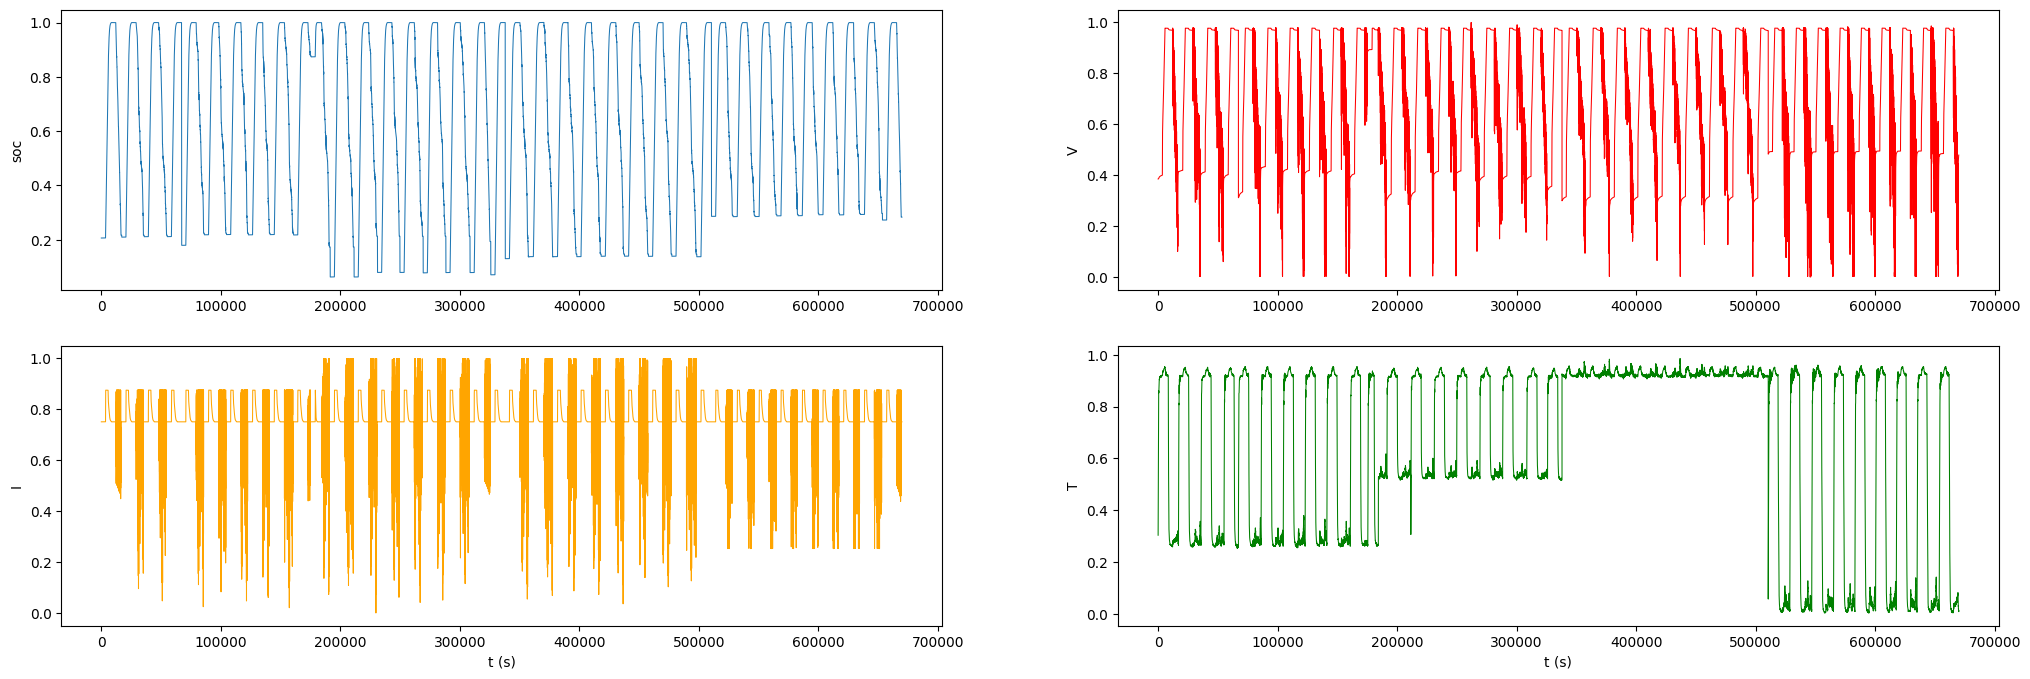

In [17]:
fig, axs = plt.subplots(ncols=2,nrows=2 ,figsize=(25,8))
sns.lineplot(data=train_df,x=train_df.index,y='soc',ax=axs[0,0],lw=0.75)
sns.lineplot(data=train_df,x=train_df.index,y='V',ax=axs[0,1],color='red',lw=0.75)
sns.lineplot(data=train_df,x=train_df.index,y='I',ax=axs[1,0],color='orange',lw=0.75)
sns.lineplot(data=train_df,x=train_df.index,y='T',ax=axs[1,1],color='green',lw=0.75)
axs[0,0].set_xlabel('')
axs[0,1].set_xlabel('')
axs[1,0].set_xlabel('t (s)')
axs[1,1].set_xlabel('t (s)')

# Model Settings

In [10]:
n_hidden_units = 55
# epochs = 5100
# number of epochs for dropping the learning rate
# l_rate_drop_period = 1000
# initial_learning_rate = 0.01
# learningratedropfactor = 0.1
# repeat = 5

In [11]:
from tensorflow.keras.layers import InputLayer, Dense, LeakyReLU
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential()
model.add(InputLayer(input_shape=(5,)))
model.add(Dense(n_hidden_units,activation='relu'))
model.add(LeakyReLU(alpha=0.03))
model.add(Dense(3,activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 55)                330       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 55)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 168       
                                                                 
Total params: 498 (1.95 KB)
Trainable params: 498 (1.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile('adam',loss='mean_squared_error')

In [25]:

X_train = train_df.drop('soc',axis=1)
y_train = train_df['soc']
model.fit(X_train,y_train,epochs=100,batch_size=250)

Epoch 1/100
2680/2680 [==============================] - 1s 355us/step - loss: 0.1742
Epoch 2/100
2680/2680 [==============================] - 1s 353us/step - loss: 0.1742
Epoch 3/100
2680/2680 [==============================] - 1s 355us/step - loss: 0.1742
Epoch 4/100
2680/2680 [==============================] - 1s 358us/step - loss: 0.1742
Epoch 5/100
2680/2680 [==============================] - 1s 361us/step - loss: 0.1742
Epoch 6/100
2680/2680 [==============================] - 1s 357us/step - loss: 0.1742
Epoch 7/100
2680/2680 [==============================] - 1s 364us/step - loss: 0.1742
Epoch 8/100
2680/2680 [==============================] - 1s 357us/step - loss: 0.1742
Epoch 9/100
2680/2680 [==============================] - 1s 349us/step - loss: 0.1741
Epoch 10/100
2680/2680 [==============================] - 1s 349us/step - loss: 0.1741
Epoch 11/100
2680/2680 [==============================] - 1s 350us/step - loss: 0.1741
Epoch 12/100
2680/2680 [============================

# Metrics

In [26]:
X_test = test_dfs[0].drop('soc',axis=1)
y_test = test_dfs[0]['soc']
eval1  =  model.evaluate(X_test,y_test)
print('Evaluation: {}'.format(eval1))
y_pred = model.predict(X_test)
# print(test_dfs.shape,y_pred)

1485/1485 [==============================] - 0s 208us/step - loss: 1.5943e-04
Evaluation: 0.00015943132166285068
1485/1485 [==============================] - 0s 187us/step


47517


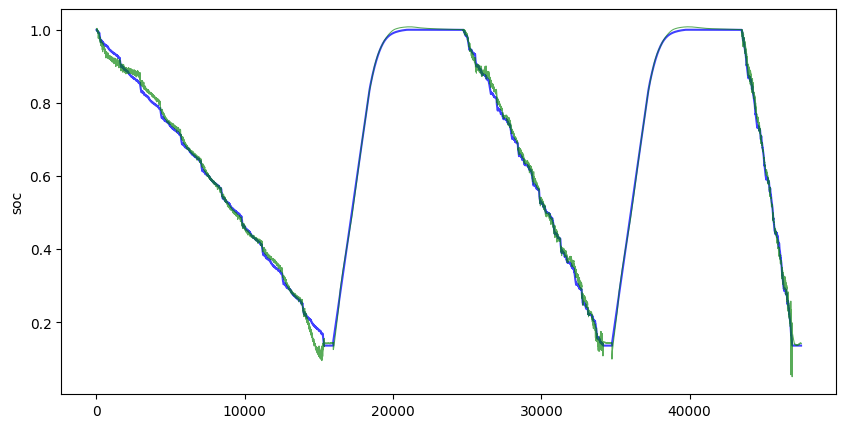

In [38]:
x = np.linspace(1,len(y_test),num=len(y_test))
# print(len(y_pred),len(y_test))
fig2, ax =plt.subplots(figsize=(10,5))
ax.plot(x,y_test,color='blue',alpha=0.75)
ax.plot(x,y_pred[:,0],color='green',marker='',lw=0.75,alpha=0.65)
ax.set_ylabel('soc')
# ax.set_xlabel('t (s)')
test = X_test[:]
print(len(x))

blue = test data

green = predicted data